In [2]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

# Interpolation

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />This notebook by Xiaozhou Li is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
All code examples are also licensed under the [MIT license](http://opensource.org/licenses/MIT).

## Interpolating Polynomial

In [3]:
def newton(x, y):
    n = np.size(x)
    v = np.zeros([n,n])
    c = np.zeros(n)
    for j in range(n):
        v[j,0] = y[j]
    for i in range(1,n):
        for j in range(n-i):
            v[j,i] = (v[j+1,i-1] - v[j,i-1])/(x[j+i]-x[j])
    for i in range(n):
        c[i] = v[0,i]
    return c

def newton_eval(x_eval, x, c):
    n = np.size(x)
    p = c[n-1]*(x_eval - x[n-2])
    for i in range(1,n-1):
        p = (p + c[n-1-i])*(x_eval - x[n-2-i])
    p = p + c[0]
    return p

def newton_plot(x, y, num):
    plt.plot(x, y, 'ro', markersize=12, linewidth=3)
    
    c = newton(x, y)
    plot_x = np.linspace(np.min(x),np.max(x),num+1)
    plot_y = np.zeros(num+1)
    for i in range(num+1):
        plot_y[i] = newton_eval(plot_x[i], x, c)
    plt.plot(plot_x, plot_y,'k', linewidth=3)

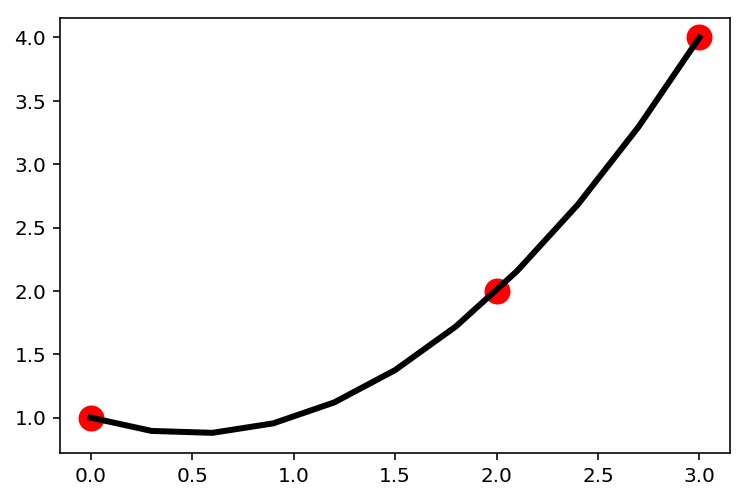

In [4]:
n = 3
x = np.array([0, 2, 3])
y = np.array([1, 2, 4])
c = newton(x,y)
newton_eval(-1, x, c)
newton_plot(x,y,10)

In [5]:
def Interpolating_demo(f, a, b, n):
    num = 200
    plot_x = np.linspace(a, b, num+1)
    plot_y = np.zeros(num+1)
    for i in range(num+1):
        plot_y[i] = f(plot_x[i])
    plt.plot(plot_x, plot_y,'b', linewidth=3)
    
    x = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    for i in range(n+1):
        y[i] = f(x[i])
    plt.plot(x, y, 'ro', markersize=12, linewidth=3)
    
    c = newton(x, y)
    for i in range(num+1):
        plot_y[i] = newton_eval(plot_x[i], x, c)
    plt.plot(plot_x, plot_y,'k', linewidth=3)      

**Example**
Interpolate the function $f(x) = \sin x$ at $4$ equally spaced points on $[0,\pi/2]$.

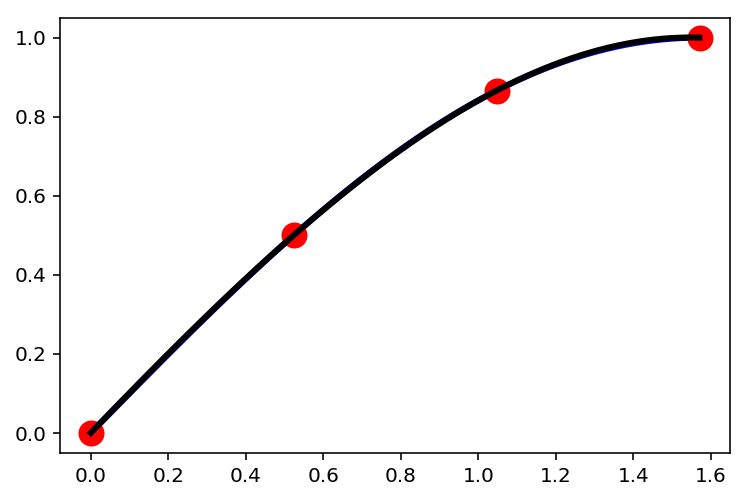

In [6]:
Interpolating_demo(np.sin, 0, np.pi/2, 3)

In [7]:
a = -np.pi
b = np.pi

w = interactive(Interpolating_demo, f=fixed(np.sin), a=fixed(a), b=fixed(b), n=widgets.IntSlider(min=1,max=20,value=1))
display(w)

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-interact',))

## Runge phenomenon

Interpolate $f(x) = 1/(1 + 12 x^2)$ at evenly spaced points in $[-1,1]$.

In [8]:
def fun(x):
    return 1/(1+12*x**2)

w = interactive(Interpolating_demo, f=fixed(fun), a=fixed(-1), b=fixed(1), n=widgets.IntSlider(min=1,max=40,value=1))
display(w)

interactive(children=(IntSlider(value=1, description='n', max=40, min=1), Output()), _dom_classes=('widget-interact',))

## Chebyshev Interpolation

### Chebyshev Polynomial

In [9]:
def poly_f(x0, x):
    n = np.size(x)
    y = 1.
    for i in range(n):
        y = y*(x0 - x[i])
    return y

def Chebyshev_demo2(f, a, b, n):
    x = np.zeros(n+1)
    for i in range(n+1):
        x[i] = np.cos((2*i+1)*np.pi/(2*(n+1)))
    x = x*(b-a)/2 + (a + b)/2
    #x = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    for i in range(n+1):
        y[i] = f(x[i], x)
    plt.plot(x, y, 'ro', markersize=12, linewidth=3)
    
    num = 200
    plot_x = np.linspace(a, b, num+1)                       
    plot_y = np.zeros(num+1)
    for i in range(num+1):
        plot_y[i] = f(plot_x[i], x)
    plt.plot(plot_x, plot_y,'b', linewidth=3)   

In [10]:
w = interactive(Chebyshev_demo2, f=fixed(poly_f), a=fixed(-1), b=fixed(1), n=widgets.IntSlider(min=1,max=20,value=1))
display(w)

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-interact',))

In [11]:
def Interpolating_demo2(f, a, b, n):
    num = 200
    plot_x = np.linspace(a, b, num+1)                       
    
    plot_y = np.zeros(num+1)
    for i in range(num+1):
        plot_y[i] = f(plot_x[i])
    plt.plot(plot_x, plot_y,'b', linewidth=3)
    
    x = np.zeros(n+1)
    for i in range(n+1):
        x[i] = np.cos((2*i+1)*np.pi/(2*(n+1)))
    x = x*(b-a)/2 + (a + b)/2
    y = np.zeros(n+1)
    for i in range(n+1):
        y[i] = f(x[i])
    plt.plot(x, y, 'ro', markersize=12, linewidth=3)
    
    c = newton(x, y)
    for i in range(num+1):
        plot_y[i] = newton_eval(plot_x[i], x, c)
    plt.plot(plot_x, plot_y,'k', linewidth=3)    

In [12]:
w = interactive(Interpolating_demo2, f=fixed(fun), a=fixed(-1), b=fixed(1), n=widgets.IntSlider(min=1,max=20,value=1))
display(w)

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-interact',))

## Piecewise-Linear Interpolation

In [13]:
def Interpolating_demo3(f, a, b, n):
    num = 200
    plot_x = np.linspace(a, b, num+1)
    plot_y = np.zeros(num+1)
    for i in range(num+1):
        plot_y[i] = f(plot_x[i])
    plt.plot(plot_x, plot_y,'b', linewidth=3)
    
    x = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    for i in range(n+1):
        y[i] = f(x[i])
    plt.plot(x, y, 'ro', markersize=12, linewidth=3)
    
    plt.plot(x, y, 'k', linewidth=3)

In [14]:
w = interactive(Interpolating_demo3, f=fixed(fun), a=fixed(-1), b=fixed(1), n=widgets.IntSlider(min=1,max=40,value=1))
display(w)

interactive(children=(IntSlider(value=1, description='n', max=40, min=1), Output()), _dom_classes=('widget-interact',))

## Cubic Splines

In [15]:
def CubicSpline_coeff(h, x, y):
    n = np.size(x)
    b = np.zeros(n) + 4.
    b[0] = 2.; b[n-1] = 2.
    a = np.zeros(n-1) + 1.
    A = np.diag(b) + np.diag(a, -1) + np.diag(a, 1)
    dy = np.zeros(n)
    for i in range(2,n-1):
        dy[i] = y[i+1] - y[i-1]
    dy[0] = y[1] - y[0]
    dy[n-1] = y[n-1] - y[n-2]
    dy = 3*dy/h
    m = np.linalg.solve(A, dy)
    return m

def CubicHermite(x, x1, x2, y1, y2, m1, m2):
    return y1*(1 + 2*(x - x1)/(x2 - x1))*((x - x2)/(x1 - x2))**2 \
            + y2*(1 + 2*(x - x2)/(x1 - x2))*((x - x1)/(x2 - x1))**2 \
              + m1*(x - x1)*((x - x2)/(x1 - x2))**2 \
                + m2*(x - x2)*((x - x1)/(x1 - x2))**2

In [16]:
def Interpolating_demo4(f, a, b, n):
    num = 200
    plot_x = np.linspace(a, b, num+1)
    plot_y = np.zeros(num+1)
    for i in range(num+1):
        plot_y[i] = f(plot_x[i])
    plt.plot(plot_x, plot_y,'b', linewidth=3)
    
    x = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    for i in range(n+1):
        y[i] = f(x[i])
        
    h = (b - a)/n
    m = CubicSpline_coeff(h, x, y)
    num1 = 10
    for i in range(n):
        x_tmp = np.linspace(x[i], x[i+1], num1+1)
        y_tmp = np.zeros(num1+1)
        for j in range(num1+1):
            y_tmp[j] = CubicHermite(x_tmp[j], x[i], x[i+1], y[i], y[i+1], m[i], m[i+1])
        plt.plot(x_tmp, y_tmp, 'k', linewidth=3)  
    plt.plot(x, y, 'ro', markersize=12, linewidth=3)

In [17]:
w = interactive(Interpolating_demo4, f=fixed(fun), a=fixed(-1), b=fixed(1), n=widgets.IntSlider(min=1,max=40,value=1))
display(w)

interactive(children=(IntSlider(value=1, description='n', max=40, min=1), Output()), _dom_classes=('widget-interact',))

In [18]:
def Interpolating_demo5(f, x, y):
    num = 200
    plot_x = np.linspace(np.min(x), np.max(x), num+1)
    plot_y = np.zeros(num+1)
    for i in range(num+1):
        plot_y[i] = f(plot_x[i])
    plt.plot(plot_x, plot_y,'b', linewidth=3)
    
    #x = np.linspace(a, b, n+1)
    #y = np.zeros(n+1)
    #for i in range(n+1):
    #    y[i] = f(x[i])
    plt.plot(x, y, 'ro', markersize=12, linewidth=3)
    
    c = newton(x, y)
    for i in range(num+1):
        plot_y[i] = newton_eval(plot_x[i], x, c)
    plt.plot(plot_x, plot_y,'k', linewidth=3)     

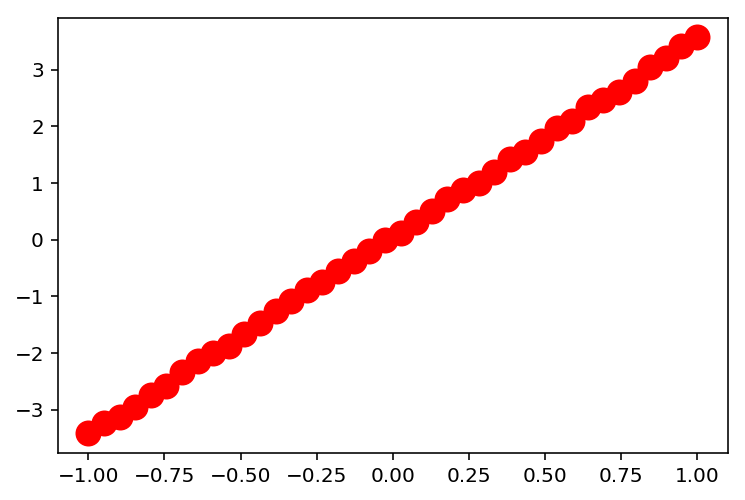

In [33]:
def fun1(x):
    #return x**3 - x**2 + x
    return 3.5*x
    
m = 40
x = np.linspace(-1,1,m)
y = np.zeros(m)
for i in range(m):
    y[i] = fun1(x[i])  
y = y + 0.1*np.random.rand(m)

plt.plot(x, y, 'ro', markersize=12, linewidth=3)

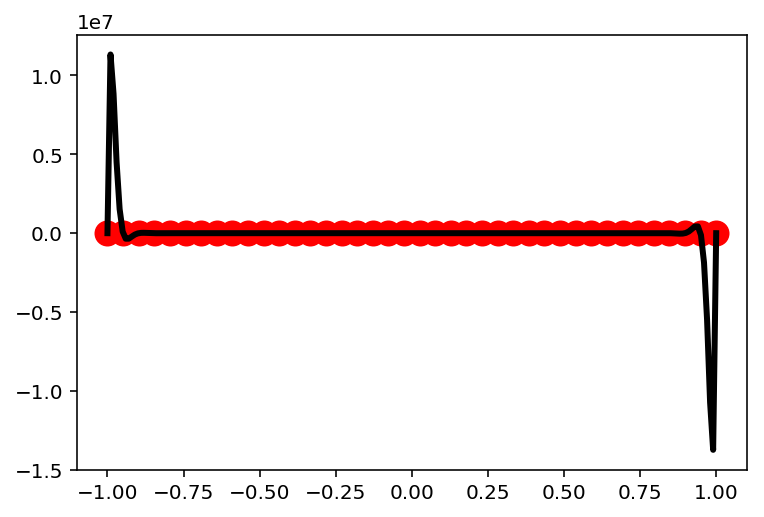

In [34]:
Interpolating_demo5(fun1, x, y)